<a href="https://colab.research.google.com/github/lijames9/APS360-Labs/blob/main/Lab1_PyTorch_and_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1. PyTorch and ANNs

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to `File -> Print` and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

**Adjust the scaling to ensure that the text is not cutoff at the margins.**

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1vPuZnLo9ce4YkZ5SB8GorWmT9QxO8-Bw#scrollTo=nuESNMuewOnT

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [85]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    sum = 0
    if type(n) != int:
      print("Invalid input")
      return -1
    if n < 0:
      print("Invalid input")
      return -1
    if n == 0:
      return 0
    while n > 0:
      sum = sum + n**3
      n -= 1
      #break point set:
      if n == 0:
        return sum

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [ ]:
help(str.split)

Help on method_descriptor:

split(self, /, sep=None, maxsplit=-1)
    Return a list of the substrings in the string, using sep as the separator string.
    
      sep
        The separator used to split the string.
    
        When set to None (the default value), will split on any whitespace
        character (including \\n \\r \\t \\f and spaces) and will discard
        empty strings from the result.
      maxsplit
        Maximum number of splits (starting from the left).
        -1 (the default value) means no limit.
    
    Note, str.split() is mainly useful for data that has been intentionally
    delimited.  With natural text that includes punctuation, consider using
    the regular expression module.



In [86]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    words = sentence.split()
    return [len(word) for word in words]  

In [87]:
word_lengths("all same length")

[3, 4, 6]

### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [88]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.
    
    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """


    '''
    words = sentence.split()
    for i in range(len(words)):
      if len(words[i]) != len(words[i+1]):
        return False
      else:
        return True
    '''

    split = word_lengths(sentence)
    return split.count(split[0]) == len(split)

In [89]:
all_same_length("all all same")

False

In [90]:
all_same_length("all same length")

False

In [91]:
all_same_length("hello world")

True

## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [92]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [93]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [94]:
matrix.size

12

$<$NumpyArray$>$.size represents the number of total elements in the matrix.

In [95]:
matrix.shape

(3, 4)

$<$NumpyArray$>$.shape returns the value of an m x n matrix as (n, m), or the dimension of the matrix.

In [96]:
vector.size

4

In [97]:
vector.shape

(4,)

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [98]:
output = []
#iterate matrix's rows
for i in range(len(matrix)):
  product = 0
  #iterate vector's columns
  for j in range(len(vector)):
    product += (matrix[i][j]*vector[j])
  output.append(product)  
output = np.array(output)


In [99]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [100]:
output2 = np.dot(matrix, vector)
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [101]:
if (output == output2).all() == True:
  print("The outputs match!")
else:
  print("The outputs do not match!")

The outputs match!


### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [103]:
import time

# record the time before running code
start_time1 = time.time()

# MANUAL MATRIX MULTIPLICATION

output = []

for i in range(len(matrix)):
  product = 0
  for j in range(len(vector)):
    product += (matrix[i][j]*vector[j])
  output.append(product)  
output = np.array(output)

# END OF MANUAL MAT MUL
end_time1 = time.time()

# TOTAL TIME ELAPSED FOR MANUAL MATRIX MULTIPLICATION
matmul_time = end_time1 - start_time1
matmul_time

# MATRIX MULTIPLICATION USING NUMPY.DOT

output2 = np.dot(matrix, vector)

# END OF NUMPY.DOT MATMULT
end_time2 = time.time()

# TIME ELAPSED BETWEEN NUMPY.DOT and MANUAL
numpydot_time = end_time2 - end_time1

print(matmul_time, numpydot_time)
print(matmul_time>numpydot_time)




0.0002524852752685547 0.0001761913299560547
True


## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [104]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [105]:
import urllib
import PIL
img = np.array(PIL.Image.open(urllib.request.urlopen('https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews')))
img
#plt.imread is depreciated, the official matplotlib website suggests to use the PIL package to load the image into the array instead.

array([[[150,  95,  38, 255],
        [147,  92,  35, 255],
        [142,  87,  30, 255],
        ...,
        [104,  57,  41, 255],
        [ 95,  57,  44, 255],
        [ 79,  52,  41, 255]],

       [[138,  82,  23, 255],
        [144,  88,  29, 255],
        [152,  96,  37, 255],
        ...,
        [105,  57,  43, 255],
        [ 99,  61,  50, 255],
        [ 81,  54,  45, 255]],

       [[157,  96,  39, 255],
        [158,  98,  38, 255],
        [158,  98,  36, 255],
        ...,
        [105,  57,  45, 255],
        [101,  63,  54, 255],
        [ 82,  55,  48, 255]],

       ...,

       [[181, 147,  99, 255],
        [180, 146,  98, 255],
        [178, 145,  94, 255],
        ...,
        [189, 165, 121, 255],
        [190, 165, 124, 255],
        [197, 172, 131, 255]],

       [[184, 150, 102, 255],
        [183, 149, 101, 255],
        [183, 149, 101, 255],
        ...,
        [189, 163, 112, 255],
        [193, 167, 118, 255],
        [198, 172, 123, 255]],

       [[182

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

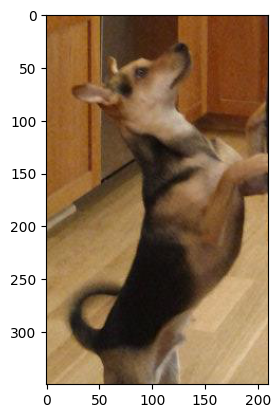

In [106]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

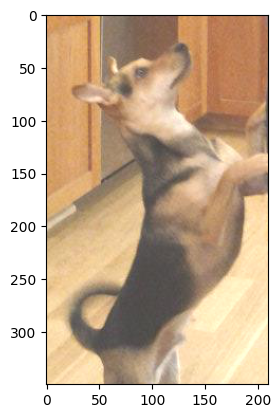

In [107]:
# adjust the range of the pixel values from 255 --> 1 by dividing all the pixel values by 255
img_adjusted = img/255

# add 0.25 to all the pixel values
img_add = img_adjusted + 0.25

# plot image
plt.imshow(np.clip(img_add, 0, 1))

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

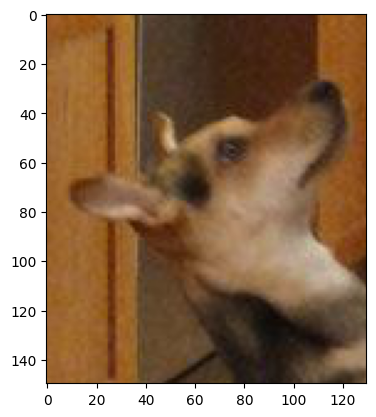

In [108]:
# 130 X 150 image but not at top left corner; this is so that all of Mochi's face can be seen
img_cropped = img[0:150, 15:145, 0:3]
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [109]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [111]:
img_torch = torch.from_numpy(img_cropped)/255
# dividing by 255 to normalize range of tensor values to [0,1] from [0,255]

img_torch

tensor([[[0.6157, 0.3765, 0.1647],
         [0.6118, 0.3725, 0.1608],
         [0.6157, 0.3765, 0.1608],
         ...,
         [0.5608, 0.3216, 0.0980],
         [0.5686, 0.3294, 0.1137],
         [0.5647, 0.3255, 0.1098]],

        [[0.6118, 0.3647, 0.1569],
         [0.6000, 0.3529, 0.1451],
         [0.6118, 0.3647, 0.1569],
         ...,
         [0.5451, 0.3059, 0.0824],
         [0.5569, 0.3176, 0.1020],
         [0.5804, 0.3412, 0.1255]],

        [[0.6118, 0.3529, 0.1490],
         [0.6039, 0.3451, 0.1412],
         [0.6196, 0.3608, 0.1569],
         ...,
         [0.5608, 0.3216, 0.1059],
         [0.5647, 0.3255, 0.1098],
         [0.5843, 0.3451, 0.1294]],

        ...,

        [[0.6078, 0.3922, 0.1804],
         [0.5922, 0.3765, 0.1647],
         [0.5843, 0.3686, 0.1569],
         ...,
         [0.3451, 0.2627, 0.1804],
         [0.3373, 0.2510, 0.1608],
         [0.4039, 0.3098, 0.2157]],

        [[0.6353, 0.4196, 0.2078],
         [0.6157, 0.4000, 0.1882],
         [0.

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [112]:
#help(np.shape)
shape = np.shape(img_torch)
shape

torch.Size([150, 130, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [113]:
torch.numel(img_torch)

58500

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [114]:
img_torch.transpose(0,2)
img_torch.transpose(0,2).shape
# This expression returns the transpose of the tensor by swapping dimensions 0 and 2. When computing the dimension, it is [3, 130, 150].

#img_torch
# The original variable is not updated, but if the transpose is further updated, the original variable img_torch will be updated as its transpose.

torch.Size([3, 130, 150])

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [115]:
img_torch.unsqueeze(0).shape
# This function adds an additional dimension to the tensor. In this case, it adds it at the very front due to the index (0).

img_torch
# The original variable is not updated with the same conditions as the transpose function, meaning img_torch will change if the 4D tensor is changed.

tensor([[[0.6157, 0.3765, 0.1647],
         [0.6118, 0.3725, 0.1608],
         [0.6157, 0.3765, 0.1608],
         ...,
         [0.5608, 0.3216, 0.0980],
         [0.5686, 0.3294, 0.1137],
         [0.5647, 0.3255, 0.1098]],

        [[0.6118, 0.3647, 0.1569],
         [0.6000, 0.3529, 0.1451],
         [0.6118, 0.3647, 0.1569],
         ...,
         [0.5451, 0.3059, 0.0824],
         [0.5569, 0.3176, 0.1020],
         [0.5804, 0.3412, 0.1255]],

        [[0.6118, 0.3529, 0.1490],
         [0.6039, 0.3451, 0.1412],
         [0.6196, 0.3608, 0.1569],
         ...,
         [0.5608, 0.3216, 0.1059],
         [0.5647, 0.3255, 0.1098],
         [0.5843, 0.3451, 0.1294]],

        ...,

        [[0.6078, 0.3922, 0.1804],
         [0.5922, 0.3765, 0.1647],
         [0.5843, 0.3686, 0.1569],
         ...,
         [0.3451, 0.2627, 0.1804],
         [0.3373, 0.2510, 0.1608],
         [0.4039, 0.3098, 0.2157]],

        [[0.6353, 0.4196, 0.2078],
         [0.6157, 0.4000, 0.1882],
         [0.

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [117]:
#help(torch.max)
max_el1 = torch.max(img_torch[:, :, 0])
max_el2 = torch.max(img_torch[:, :, 1])
max_el3 = torch.max(img_torch[:, :, 2])

# max float value for each RGB color channel
print(max_el1, max_el2, max_el3)

print(torch.max(torch.max(img_torch, 0)[0], 0)[0])

tensor(0.8941) tensor(0.7882) tensor(0.6745)
tensor([0.8941, 0.7882, 0.6745])


## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate

Please select at least three different options from the list above. For each option, please select two to three different parameters and provide a table. 


In [118]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = torch.sigmoid(activation1) # function was changed from ReLU to sigmoid and tanh activation functions
        activation2 = self.layer2(activation1)
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9) # lr variable (learning rate) was increased/decreased

# iteration variable was added here to increase number of training iterations
iter = 30
for i in range(iter):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.0
Training Accuracy: 1.0
Test Error Rate: 0.085
Test Accuracy: 0.915


For the training data, I tuned various parameters to improve the training accuracy of the model (originally 0.964).

By increasing the number of iterations when training (originally only 1 iteration):

*   3 iterations:
*   10 iterations: 0.999
*   20 iterations: 0.999
*   30 iterations: 1.0

By adjusting the learning rate of the training (originally 0.005):

* 0.01 LR: 0.961
* 0.003 LR: 0.956
* 0.015 LR: 0.871
* 0.1 LR: 0.688
* 0.0045 LR: 0.967

By adjusting the type of activation function (originally ReLU):

* Sigmoid function: 0.927
* Tanh function: 0.96

The change the resulted in the highest accuracy was increasing the number of iterations performed on the training set, to which the model could achieve a 100% accuracy at 30 iterations (above code).




### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 20)
        self.layer3 = nn.Linear(20, 1)
        #self.layer4 = nn.Linear(10, 1)
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1) # function was changed from ReLU to sigmoid and tanh activation functions
        activation2 = self.layer2(activation1)
        activation2 = F.relu(activation2)
        activation3 = self.layer3(activation2)
        #activation3 = F.relu(activation3)
        #activation4 = self.layer4(activation3)
        return activation3

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
#optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9) # lr variable (learning rate) was increased/decreased
optimizer = optim.Adam(pigeon.parameters(), lr = 0.004)

# iteration variable was added here to increase number of training iterations

iter = 20
for i in range(iter):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))                                                                                    

Training Error Rate: 0.001
Training Accuracy: 0.999
Test Error Rate: 0.046
Test Accuracy: 0.954


For the testing data, I tuned various parameters to improve the training accuracy of the model (originally 0.921), keeping the number of layers at 2.

By increasing the number of iterations when training (originally only 1 iteration):

*   3 iterations: 0.931
*   10 iterations: 0.9410000000000001
*   20 iterations: 0.942
*   30 iterations: 0.9410000000000001

By adjusting the learning rate of the training (originally 0.005):

* 0.01 LR: 0.918
* 0.015 LR: 0.892
* 0.1 LR: 0.703
* 0.0045 LR: 0.915
* 0.0061 LR: 0.924


By adjusting the type of activation function (originally ReLU):

* Sigmoid function: 0.883
* Tanh function: 0.906

Similarly to the training set, the change the resulted in the highest accuracy was increasing the number of iterations performed on the testing set, to which the model could achieve a 94.2% accuracy.


However, if you add an additional layer, using the ReLU activation function,  have 20 iterations, and use the Adam optimizer instead of SGD, the testing accuracy becomes 95.4%.

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?

In [121]:
#You should use the model hyperparameters from part b because it yields a higher testing accuracy. 
#This means that the model is better suited for incoming and new data which is more important than training data.
#From the 100% accuracy of the training set, we can conclude that the model hyperparameters in part a lead to 
#overfitting which is a concern.